In [1]:
from keras.models import Sequential
from keras.layers import Dense # layers -> 모델구성
from sklearn.datasets import make_regression
# 신경망에서는 정규화가 우선임
from sklearn.preprocessing import MinMaxScaler
X,y = make_regression(n_samples=100, n_features=2,noise=0.1,random_state=1)
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(100,1))
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1))
# keras 모델
model = Sequential()
# 100*2 출력차수지정, 2*4 -> 100*4
# layer depth
# Dense는 FFNN망을 구성할때 씀
model.add(Dense(4, input_dim=2, activation='relu'))
# 100*4 / 4*4 / 100*4
model.add(Dense(4, activation='relu'))
# 100*4 / 4*1 / 100*1 예측
model.add(Dense(1, activation='linear'))
# backend = tensorflow
# loss 에 mse, cross enthropy, KL-divergence : 분포를 비교
model.compile(loss='mse', optimizer='adam') # tensorflow 모델을변환
model.fit(X,y, epochs=1000, verbose=0)
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1,random_state=1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
    print("입력데이터=%s, 예측결과=%s"%(Xnew[i], ynew[i]))

Using TensorFlow backend.
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_05\Anaconda3\envs


입력데이터=[0.29466096 0.30317302], 예측결과=[0.17337991]
입력데이터=[0.39445118 0.79390858], 예측결과=[0.74688774]
입력데이터=[0.02884127 0.6208843 ], 예측결과=[0.40194318]


In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data", delimiter=",")
X = dataset[:,0:8] # 8개 독립변수
Y = dataset[:,8] # 종속변수
model = Sequential()
# ? * 8 / 8*12 => ?*12
model.add(Dense(12, input_dim=8,kernel_initializer='uniform', activation='relu'))
# ?*12 / 12*8 -> ?*8
model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
# ? * 8 / 8*1 -> ?*1 분류
model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid')) # 0.5
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 데이터 분리입력 (train, test) :과적합 되는상황이나옴
# train, validation, test
history = model.fit(X,Y,validation_split=0.33 ,epochs=150, batch_size=10)
scores = model.evaluate(X,Y)
print("\n%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 639us/step - loss: 0.6796 - accuracy: 0.6401 - val_loss: 0.6586 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 163us/step - loss: 0.6688 - accuracy: 0.6401 - val_loss: 0.6533 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 111us/step - loss: 0.6616 - accuracy: 0.6401 - val_loss: 0.6510 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 134us/step - loss: 0.6545 - accuracy: 0.6362 - val_loss: 0.6456 - val_accuracy: 0.6890
Epoch 5/150
514/514 [==============================] - 0s 111us/step - loss: 0.6456 - accuracy: 0.6420 - val_loss: 0.6363 - val_accuracy: 0.7008
Epoch 6/150
514/514 [==============================] - 0s 116us/step - loss: 0.6386 - accuracy: 0.6537 - val_loss: 0.6227 - val_accurac

514/514 [==============================] - 0s 116us/step - loss: 0.5293 - accuracy: 0.7315 - val_loss: 0.5532 - val_accuracy: 0.7480
Epoch 55/150
514/514 [==============================] - 0s 125us/step - loss: 0.5268 - accuracy: 0.7412 - val_loss: 0.5586 - val_accuracy: 0.7283
Epoch 56/150
514/514 [==============================] - 0s 111us/step - loss: 0.5388 - accuracy: 0.7374 - val_loss: 0.5556 - val_accuracy: 0.7402
Epoch 57/150
514/514 [==============================] - 0s 106us/step - loss: 0.5400 - accuracy: 0.7354 - val_loss: 0.5697 - val_accuracy: 0.7205
Epoch 58/150
514/514 [==============================] - 0s 117us/step - loss: 0.5294 - accuracy: 0.7179 - val_loss: 0.5652 - val_accuracy: 0.7047
Epoch 59/150
514/514 [==============================] - 0s 114us/step - loss: 0.5423 - accuracy: 0.7296 - val_loss: 0.5511 - val_accuracy: 0.7441
Epoch 60/150
514/514 [==============================] - 0s 116us/step - loss: 0.5337 - accuracy: 0.7335 - val_loss: 0.5508 - val_accuracy

514/514 [==============================] - 0s 107us/step - loss: 0.5047 - accuracy: 0.7451 - val_loss: 0.5521 - val_accuracy: 0.7323
Epoch 111/150
514/514 [==============================] - 0s 105us/step - loss: 0.5188 - accuracy: 0.7393 - val_loss: 0.5266 - val_accuracy: 0.7520
Epoch 112/150
514/514 [==============================] - 0s 112us/step - loss: 0.5048 - accuracy: 0.7451 - val_loss: 0.5292 - val_accuracy: 0.7559
Epoch 113/150
514/514 [==============================] - 0s 118us/step - loss: 0.5094 - accuracy: 0.7490 - val_loss: 0.5190 - val_accuracy: 0.7677
Epoch 114/150
514/514 [==============================] - 0s 107us/step - loss: 0.5041 - accuracy: 0.7432 - val_loss: 0.5131 - val_accuracy: 0.7717
Epoch 115/150
514/514 [==============================] - 0s 113us/step - loss: 0.5057 - accuracy: 0.7529 - val_loss: 0.5202 - val_accuracy: 0.7677
Epoch 116/150
514/514 [==============================] - 0s 113us/step - loss: 0.5062 - accuracy: 0.7451 - val_loss: 0.5146 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


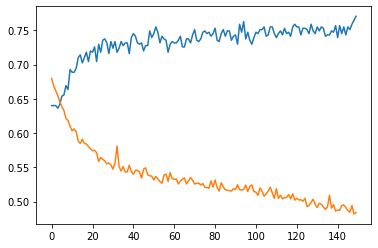

In [3]:
import matplotlib.pyplot as plt
print(history.history.keys())
# loss, accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

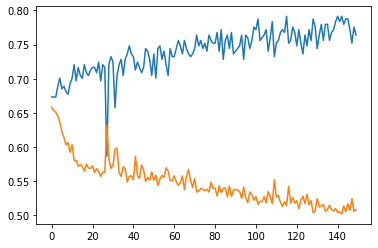

In [4]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.show()

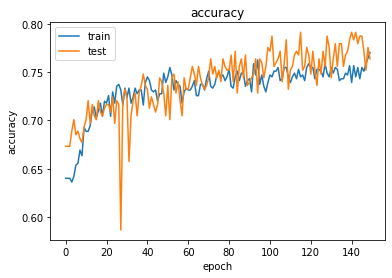

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

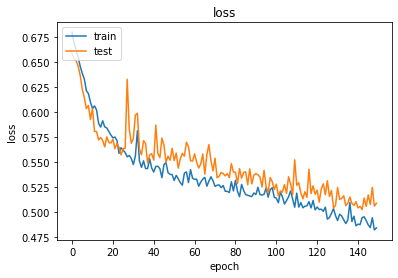

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [7]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=.3)

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'binary classification')]

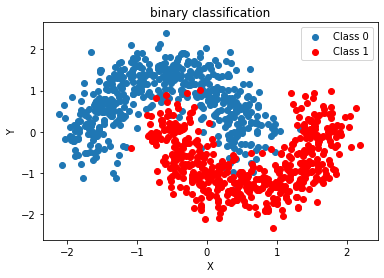

In [8]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0,0], X[Y==0,1], label='Class 0')
ax.scatter(X[Y==1,0], X[Y==1,1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='binary classification')

In [9]:
X_train.shape


(700, 2)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# 비선형 모델 - 신경망
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu')) # 차원확대
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='AdaDelta',loss='binary_crossentropy', metrics=['accuracy'])
# callback 함수는 window 자동으로 호출되는 함수 / 이미지 출력할 준비를해라
tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph/model_1/',histogram_freq=100,write_graph=True,write_images=False)
tb_callback.set_model(model) # 콜백을 모델에 등록

In [11]:
hist = model.fit(X_train,Y_train,batch_size=32, epochs=200,verbose=0,callbacks=[tb_callback] ,validation_data =(X_test,Y_test))

In [12]:
score = model.evaluate(X_test,Y_test, verbose=0)
print("Test loss :", score[0])
print("Test accuracy : ", score[1])

Test loss : 0.08657280007998149
Test accuracy :  0.9666666388511658


In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:",score[0])
print("Test accuracy :", score[1])

Test loss: 0.08657280007998149
Test accuracy : 0.9666666388511658


In [14]:
keras.utils.print_summary(model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [15]:
# conda install graphviz
# conda install pydot
import pydot
from keras.utils.vis_utils import model_to_dot

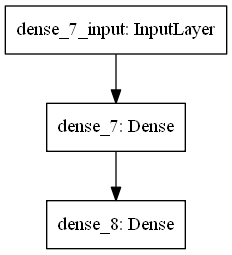

In [16]:
from keras.utils import plot_model
plot_model(model)

In [17]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

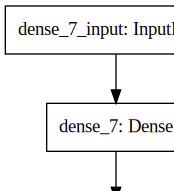

In [18]:
from IPython.display import Image, SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [20]:
import keras
# Callback class
# Custum callback 함수 제작
# 함수에 의해서 호출되는 객체
class CustomHistory(keras.callbacks.Callback): # 상속
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self,batch, logs={}): # 오버라이딩
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

In [21]:
from keras.datasets import mnist
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


<function matplotlib.pyplot.show(*args, **kw)>

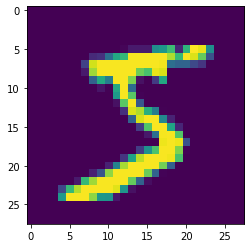

In [22]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show

In [23]:
X_train = X_train0.reshape(60000,784).astype('float32')/255.0
X_test = X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype) # 60000 * 784

(60000, 784) float32


In [24]:
y_train0[:5]
# one hot encoding 여부 : multi - label-> softmax
# 경우에 수에 대한 확률값

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0,10)
Y_test = np_utils.to_categorical(y_test0,10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [26]:
from keras.optimizers import SGD
import numpy as np
np.random.seed(0)
model = Sequential()
# 60000 * 784
model.add(Dense(512, input_dim=784, activation='sigmoid'))
# 60000 * 15 / 15 *10 -> 60000*10
model.add(Dense(15))
model.add(Dense(10, activation='sigmoid'))
# lr : learning rate
# stochastic gradient descent
model.compile(optimizer=SGD(lr=0.2), loss='mse', metrics=['accuracy'])

In [9]:
model.layers

In [10]:
l1 = model.layers[0]
l2 = model.layers[1]
# 레이어 속성으로 정보확인
l1.name
l1.input_shape
l1.output_shape
l1.activation

<function keras.activations.sigmoid(x)>

In [27]:
custom_hist = CustomHistory()
custom_hist.init()
hist = model.fit(X_train,Y_train, nb_epoch=30, batch_size=100,validation_data=(X_test, Y_test),callbacks = [custom_hist], verbose=2)


C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 0.0860 - accuracy: 0.3521 - val_loss: 0.0768 - val_accuracy: 0.5219
Epoch 2/30
 - 2s - loss: 0.0679 - accuracy: 0.6147 - val_loss: 0.0583 - val_accuracy: 0.7312
Epoch 3/30
 - 2s - loss: 0.0512 - accuracy: 0.7517 - val_loss: 0.0434 - val_accuracy: 0.7966
Epoch 4/30
 - 2s - loss: 0.0400 - accuracy: 0.8070 - val_loss: 0.0354 - val_accuracy: 0.8313
Epoch 5/30
 - 2s - loss: 0.0339 - accuracy: 0.8359 - val_loss: 0.0306 - val_accuracy: 0.8585
Epoch 6/30
 - 2s - loss: 0.0302 - accuracy: 0.8540 - val_loss: 0.0276 - val_accuracy: 0.8690
Epoch 7/30
 - 2s - loss: 0.0276 - accuracy: 0.8640 - val_loss: 0.0257 - val_accuracy: 0.8801
Epoch 8/30
 - 2s - loss: 0.0259 - accuracy: 0.8712 - val_loss: 0.0241 - val_accuracy: 0.8829
Epoch 9/30
 - 2s - loss: 0.0245 - accuracy: 0.8766 - val_loss: 0.0229 - val_accuracy: 0.8876
Epoch 10/30
 - 2s - loss: 0.0235 - accuracy: 0.8802 - val_loss: 0.0220 - val_accuracy: 0.8893
Epoch 11/30
 - 2s -

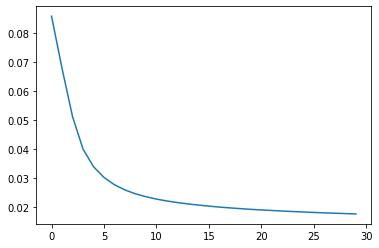

{'val_loss': [0.07683572359383106,
  0.058346459940075875,
  0.043395434096455576,
  0.035351510848850014,
  0.030587551379576326,
  0.027587511772289873,
  0.02565657002851367,
  0.024116867994889615,
  0.02291917126160115,
  0.02197429986204952,
  0.021352888839319347,
  0.02069739379454404,
  0.020257365566212684,
  0.019831209531985222,
  0.019370711143128574,
  0.019012495952192694,
  0.01882202273234725,
  0.01863368195015937,
  0.018302158876322208,
  0.018001458803191782,
  0.017809624368092046,
  0.01769249906996265,
  0.017546580808702857,
  0.017363982429960744,
  0.017153626923682167,
  0.016994106689235195,
  0.016855306971119716,
  0.01680444817757234,
  0.016699057074729354,
  0.0165742812550161],
 'val_accuracy': [0.5218999981880188,
  0.7311999797821045,
  0.7965999841690063,
  0.8313000202178955,
  0.8585000038146973,
  0.8690000176429749,
  0.8801000118255615,
  0.8828999996185303,
  0.8876000046730042,
  0.8892999887466431,
  0.8931000232696533,
  0.89410001039505,


In [28]:
plt.plot(hist.history['loss'])
plt.show()
hist.history

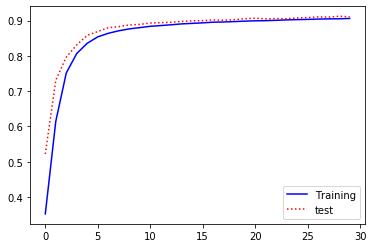

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.3521, 0.61468333, 0.75173336, 0.80698335, 0.8358833, 0.85396665, 0.86405, 0.87118334, 0.87655, 0.88015, 0.8839333, 0.88595, 0.8882333, 0.89073336, 0.8921833, 0.89365, 0.89558333, 0.89605, 0.89725, 0.89848334, 0.8993833, 0.89985, 0.9008833, 0.90208334, 0.9028, 0.9035, 0.90431666, 0.90491664, 0.9051833, 0.9061667]
0.9108999967575073


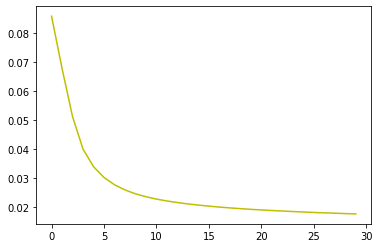

In [29]:
plt.plot(hist.history['accuracy'], 'b-', label='Training')
plt.plot(hist.history['val_accuracy'], 'r:', label='test')
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['accuracy'])
print(hist.history['val_accuracy'][29])
plt.show()
plt.plot(custom_hist.train_loss, 'y', label='train loss')
plt.show()

In [30]:
model.predict(X_test[:1,:])


array([[1.0713100e-02, 1.1026859e-06, 1.7379522e-02, 2.8065801e-02,
        8.6098909e-05, 2.0193160e-03, 1.4632940e-05, 9.9654269e-01,
        2.6363239e-04, 1.2955454e-03]], dtype=float32)

In [31]:
# 문제 X_test의 이미지 한장의 label을 예측해보시오
model.predict(X_test[:1,:])

array([[1.0713100e-02, 1.1026859e-06, 1.7379522e-02, 2.8065801e-02,
        8.6098909e-05, 2.0193160e-03, 1.4632940e-05, 9.9654269e-01,
        2.6363239e-04, 1.2955454e-03]], dtype=float32)

In [32]:
model.predict_classes(X_test[:1,:], verbose=0)

array([7], dtype=int64)

In [33]:
# 보스턴집값예측
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [34]:
num_faetures=13
model = Sequential()
model.add(Dense(1, input_dim=num_faetures, activation='linear'))

In [35]:
model.summary()
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
404/404 [==============================] - 0s 736us/step - loss: 28031.2535 - mae: 127.1642
Epoch 2/10
404/404 [==============================] - 0s 573us/step - loss: 3554.3965 - mae: 46.6836
Epoch 3/10
404/404 [==============================] - 0s 580us/step - loss: 1257.6941 - mae: 27.5113
Epoch 4/10
404/404 [==============================] - 0s 572us/step - loss: 298.5174 - mae: 12.8495
Epoch 5/10
404/404 [==============================] - 0s 578us/step - loss: 140.4095 - mae: 8.7667
Epoch 6/10
404/404 [==============================] - 0s 548us/step - loss: 126.6947 - mae: 8.0275
Epoch 7/10
404/404 [=============================

In [36]:
# mae
mse, mae = model.evaluate(x_test,y_test,verbose=False)
rmse= np.sqrt(mse)
mse,rmse,mae

(80.5265775194355, 8.973660207486994, 6.593564033508301)

array([ 7.2, 18.8, 19. ])

In [37]:
# 문제 : x_test의 3집을 예상하시오.
model.evaluate(x_test,y_test,verbose=False)

[80.5265775194355, 6.593564033508301]

In [38]:
pred = model.predict(x_test[:3,:])
real = y_test[:3]
print(model.predict(x_test[:3,:]))
print('실제집값 :', y_test[:3])

[[ 8.539897]
 [19.76989 ]
 [27.80211 ]]
실제집값 : [ 7.2 18.8 19. ]


In [39]:
pred =pred.reshape(3)

In [40]:
import numpy as np
np.corrcoef(pred,real)

array([[1.        , 0.91582434],
       [0.91582434, 1.        ]])